In [ ]:
# Last Lesson we focused on calculating climatologies and anomalies. What were those again?
# This lesson, we will use this information and take it a step further to identify extreme events

In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

tdir = '/work/Veeshan.Narinesingh/INTERNS_2024/ERA5/TEMPERATURE/'
ny1=1979 # specify the first year of the data files
ny2=2019 # specify the last year of the data files
# this time we will load in the temperature for more than 1 year
# this can take up a lot of memory so to make things simpler, we will just focus on one gridpoint


# note the *, this is a wildcard that will extract all files
tfiles='ERA5_temperature.model_level_137.daily.*.nc'

#load in the dataset using xarray
tds = xr.open_mfdataset(tdir+tfiles) 
lon=tds.lon.values
lat=tds.lat.values

In [5]:
# take a look at the dataset, notice that it is now 14,975 elements long in the time dimension
tds

<xarray.Dataset>
Dimensions:  (time: 14975, lat: 145, lon: 288)
Coordinates:
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 90.0 88.75 87.5 86.25 ... -86.25 -87.5 -88.75 -90.0
  * time     (time) float64 7.228e+05 7.228e+05 ... 7.378e+05 7.378e+05
Data variables:
    t        (time, lat, lon) float64 dask.array<chunksize=(365, 145, 288), meta=np.ndarray>

In [10]:
# the time dimension in this data set is in matlab format, generate a time axis that is in python format

timedr = pd.date_range(start=str(ny1)+'-01-01', end=str(ny2)+'-12-31', freq='D')
# Convert to a list of datetime objects
timedt = timedr.to_pydatetime().tolist()

In [13]:
# verify the new time dimension makes sense
timedr

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=14975, freq='D')

In [22]:
# Now let's select the location we want to focus on, I will do New York, since that's where I am from

loclon=360-74 # NY is 74 West longitude, but the longitude dimension goes from 0 to 360, so we do 360-74
loclat=40.71

# extract just the data for that location and convert to Fahrenheit 

loct=1.8*(tds.t.sel(lat=loclat,lon=loclon,method='nearest').values-273.15)+32

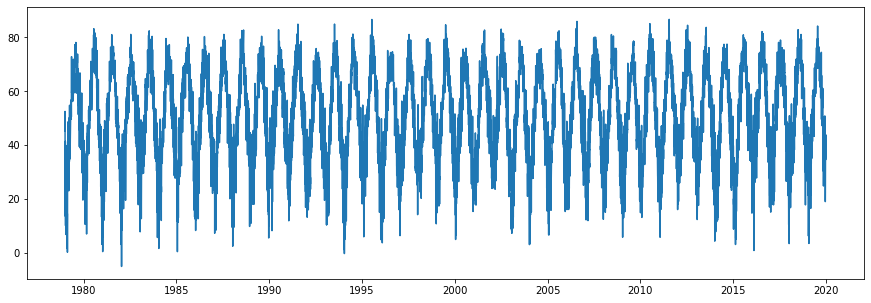

In [30]:
# now plot it
fig=plt.figure(figsize=[15,5])
plt.plot(timedr,loct)

# describe what you see in the graph


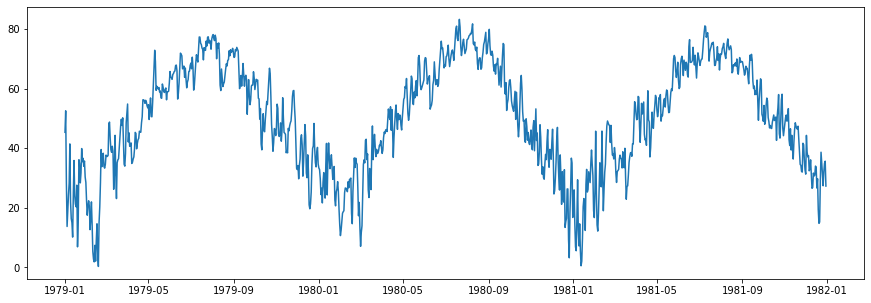

In [31]:
# now let's zoom in and just plot the first 3 years

fig=plt.figure(figsize=[15,5])
plt.plot(timedr[0:365*3],loct[0:365*3])


# Describe what you see. Where does the graph peak? Where does it dip? Why?

In [35]:
# let's revisit the concept of the climatology, and calculate it in a naive way by just averaging
# all timesteps

mean1=loct.mean()
mean1

# this is the average temperature in NY 

50.80660520892275

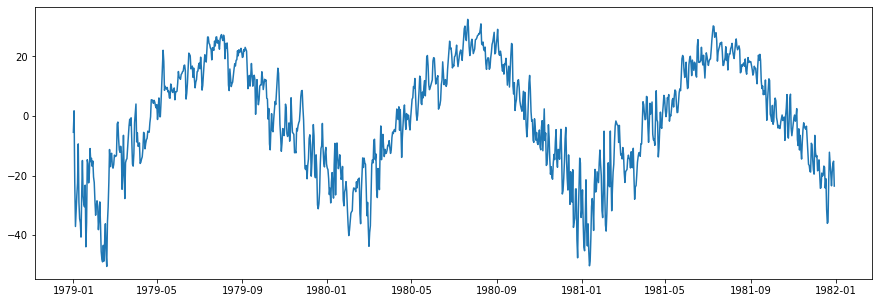

In [39]:
# now let's calculate the anomaly using this naive climatological value
# then plot it

anom1=loct-mean1

fig=plt.figure(figsize=[15,5])
plt.plot(timedr[0:365*3],anom1[0:365*3])


# Notice however, that our anomalies still have a seasonal cycle to them, 
# i.e. winters are anomalously cold while summers are anomalously warm 

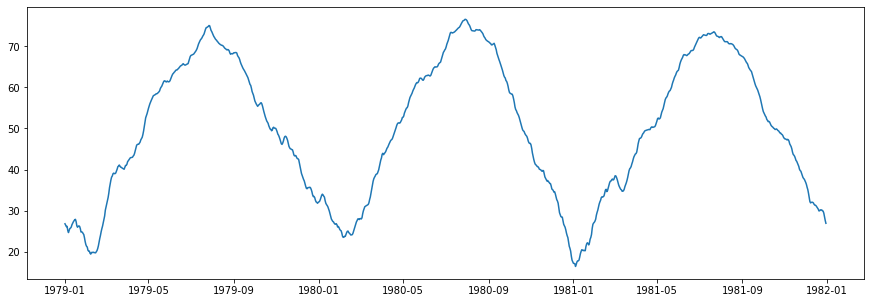

In [43]:
# last lesson we instead calculated the climatology using a seasonal average
# this, however, is still problematic because for the JJA seasonal average, 
# June will be colder, thus it is better to calculate your use a 30 day running mean
# to calculate your climatology. 



# first turn the temperature vector (loct) into an xarray format
loctxr = xr.DataArray(loct, coords=[timedr], dims=["time"])


# then do a 30 day running mean
meanseasonal=loctxr.rolling(time=30,center=True,min_periods=1).mean()


# now plot it

fig=plt.figure(figsize=[15,5])
plt.plot(timedr[0:365*3],meanseasonal[0:365*3])

# with this way of calculating the average, you see that all the wiggles are taken out, a.k.a.
# the short timescale variability, but we still retain a mean seasonal cycle

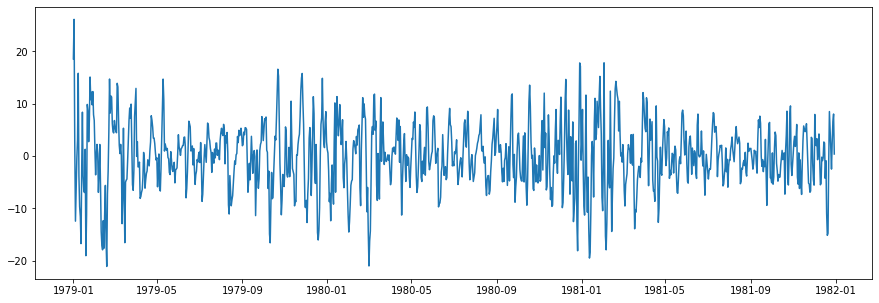

In [45]:
# now let's calculate the anomaly using the new mean we calculated

anom2=loct-meanseasonal

fig=plt.figure(figsize=[15,5])
plt.plot(timedr[0:365*3],anom2[0:365*3])

# Look at the biggest spikes and biggest dips. Do they line up with the raw field?
# Develop code to find the min and max anomaly in the timeseries?

In [ ]:
# Repeat the analyses above with another location of your own choosing

# first calculate the climatology using the average of the full timeseries at that location to
# get the annual averaged temperature

# then calculate and plot the 30 day running average of temperature and then plot it for that location

# then calculate the anomaly and plot it for that location

#how does the temperature data and plots for the new location compare to my plots for NY?


# do some exploration with the data and play around, Some questions could be how do different locations compare to one another?
# How do different years compare to one another? How do the min and max anomalies compare from location to location? etc..